<a href="https://colab.research.google.com/github/DarmianNong/PortfolioProjects/blob/main/btap_khoa4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import thu vien

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import data + check null

In [ ]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
aum=pd.read_excel('aum.xlsx')
aum.head(5)

,customer_id,amount
0,999992,6.197167e+08
1,999994,5.312117e+07
2,1000017,0.000000e+00
3,1000018,6.678269e+04
4,1000021,7.766416e+07


In [ ]:
aum.isnull().sum()

customer_id    0
amount         0
dtype: int64

In [ ]:
aum['customer_id'].dtype

dtype('int64')

In [ ]:
aum.amount.dtype


dtype('float64')

In [ ]:
aum['amount']=aum['amount'].astype(float)

In [ ]:
cust=pd.read_excel('cust.xlsx')
cust.head(5)

,customer_id,segment,province_city
0,1016846,Regular,HA NOI
1,1016868,Regular,HO CHI MINH
2,1016903,Regular,HO CHI MINH
3,1016936,Regular,HO CHI MINH
4,1016938,Regular,HA NOI


In [ ]:
cust.isnull().sum()

customer_id      0
segment          0
province_city    0
dtype: int64

In [ ]:
cust['customer_id'].dtype

dtype('int64')

In [ ]:
cust['segment'].dtype

dtype('O')

In [ ]:
cust['province_city'].dtype

dtype('O')

In [ ]:
prod_holding=pd.read_excel('prod_holding.xlsx')
prod_holding.head(5)

,customer_id,prod_ca,prod_td,prod_credit_card
0,1016846,1,0,0.0
1,1016868,1,0,0.0
2,1016903,1,0,0.0
3,1016936,1,0,0.0
4,1016938,1,0,1.0


In [ ]:
prod_holding.isnull().sum()

customer_id           0
prod_ca               0
prod_td               0
prod_credit_card    996
dtype: int64

In [ ]:
prod_holding.shape

(113066, 4)

fill null data bang median

In [ ]:
prod_holding['prod_credit_card'] = prod_holding['prod_credit_card'].fillna(prod_holding['prod_credit_card'].median())

In [ ]:
prod_holding.isnull().sum()

customer_id         0
prod_ca             0
prod_td             0
prod_credit_card    0
dtype: int64

doi ten cot

In [ ]:
aum = aum.rename(columns={'customer_id':'cust_id'})
aum.head(5)

,cust_id,amount
0,999992,6.197167e+08
1,999994,5.312117e+07
2,1000017,0.000000e+00
3,1000018,6.678269e+04
4,1000021,7.766416e+07


In [ ]:
cust = cust.rename(columns={'customer_id':'cust_id'})
cust.head(5)

,cust_id,segment,province_city
0,1016846,Regular,HA NOI
1,1016868,Regular,HO CHI MINH
2,1016903,Regular,HO CHI MINH
3,1016936,Regular,HO CHI MINH
4,1016938,Regular,HA NOI


In [ ]:
prod_holding = prod_holding.rename(columns={'customer_id':'cust_id'})
prod_holding.head(5)

,cust_id,prod_ca,prod_td,prod_credit_card
0,1016846,1,0,0.0
1,1016868,1,0,0.0
2,1016903,1,0,0.0
3,1016936,1,0,0.0
4,1016938,1,0,1.0


Số lượng và Tỷ trọng khách hàng theo từng phân khúc là bao nhiêu? Tạo bảng gồm các cột như dưới đây sau đó vẽ bar chart thể hiện số lượng khách hàng

In [ ]:
bt1 = cust.groupby('segment').agg(Number_of_customer=('cust_id','nunique')).reset_index()
bt1

,segment,Number_of_customer
0,Gold,3632
1,Regular,91166
2,Silver,18268


In [ ]:
bt1['Proportion']=bt1['Number_of_customer']/bt1['Number_of_customer'].sum()*100
bt1

,segment,Number_of_customer,Proportion
0,Gold,3632,3.212283
1,Regular,91166,80.630782
2,Silver,18268,16.156935


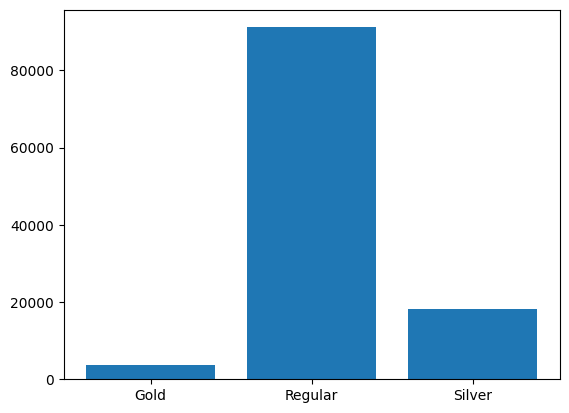

In [ ]:
plt.bar(bt1.segment,bt1['Number_of_customer'])
plt.show()

Khách hàng của từng phân khúc tập trung chủ yếu ở những tỉnh, thành phố nào? Sắp xếp theo thứ tự từ lớn nhất đến nhỏ nhất của các cột Regular, Silver, Gold. 

In [ ]:
bt2 = cust.groupby(['segment','province_city']).agg(Number_of_customer=('cust_id','nunique')).reset_index()
bt2

,segment,province_city,Number_of_customer
0,Gold,AN GIANG,4
1,Gold,BAC GIANG,48
2,Gold,BAC NINH,18
3,Gold,BINH DINH,9
4,Gold,BINH DUONG,5
...,...,...,...
111,Silver,THUA THIEN HUE,224
112,Silver,TIEN GIANG,9
113,Silver,VINH LONG,36
114,Silver,VINH PHUC,112


In [ ]:
bt2a = bt2.pivot_table(values='Number_of_customer',index='province_city',columns='segment',fill_value=0,aggfunc=np.sum)
bt2a

segment,Gold,Regular,Silver
province_city,,,
AN GIANG,4,863,73
BAC GIANG,48,1066,272
BAC NINH,18,341,81
BINH DINH,9,388,70
BINH DUONG,5,984,101
BINH THUAN,14,396,86
CA MAU,0,8,0
CAN THO,20,804,125
DA LAT,1,39,7


In [ ]:
bt2a.sum()

segment
Gold        3632
Regular    91166
Silver     18268
dtype: int64

In [ ]:
aum['cust_id']=aum['cust_id'].astype(str)

In [ ]:
aum['amount']=aum['amount'].astype(int)

In [ ]:
aum.describe()

,amount
count,1.130660e+05
mean,6.548123e+07
std,1.022876e+09
min,0.000000e+00
25%,2.386600e+04
50%,6.794850e+04
75%,1.094568e+06
max,1.325000e+11


AUM của khách hàng (Min, Q25, Q50, Q75, Q90, Max, Mean) giữa các phân khúc là như thế nào? (tạo bảng và vẽ box plot cho 3 segment) 

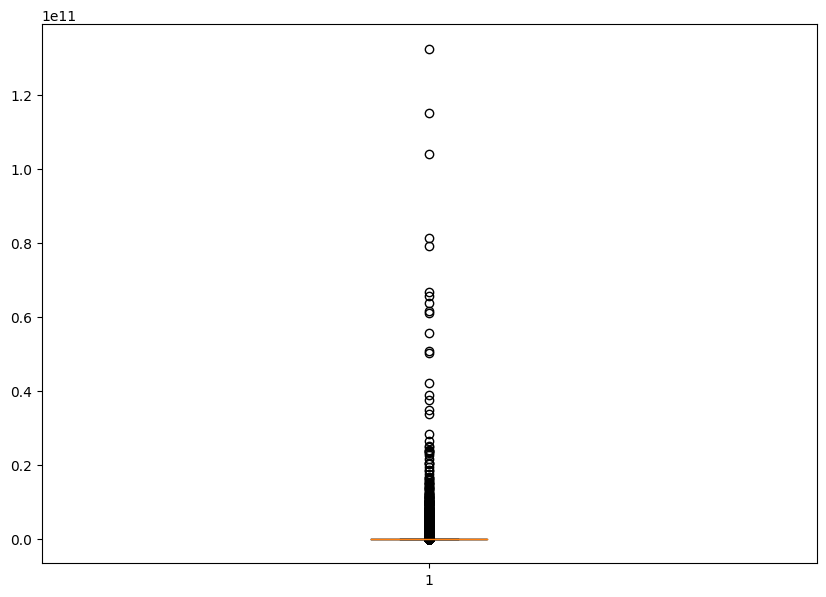

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(aum['amount'])
plt.show()

Tỷ lệ nắm giữ các sản phẩm (Product Penetration) Credit Card, Current Account, Term Deposit của tập khách hàng Regular là như thế  nào? 

In [ ]:
bt3 = prod_holding.merge(cust,on='cust_id')
bt3.head(5)


,cust_id,prod_ca,prod_td,prod_credit_card,segment,province_city
0,1016846,1,0,0.0,Regular,HA NOI
1,1016868,1,0,0.0,Regular,HO CHI MINH
2,1016903,1,0,0.0,Regular,HO CHI MINH
3,1016936,1,0,0.0,Regular,HO CHI MINH
4,1016938,1,0,1.0,Regular,HA NOI


In [ ]:
bt3c = bt3[bt3['segment']=='Regular']

In [ ]:
bt3b = bt3[bt3['segment']=='Regular'].groupby('segment').agg(Credit_card=('prod_credit_card','sum'),Term_deposit=('prod_td','sum'),Current_account=('prod_ca','sum')).reset_index()
bt3b

,segment,Credit_card,Term_deposit,Current_account
0,Regular,12255.0,7523,82658


In [ ]:
bt3a = bt3c.melt(id_vars='cust_id',value_vars=['prod_ca','prod_td','prod_credit_card'],var_name='Product',value_name='Using')
bt3a

,cust_id,Product,Using
0,1016846,prod_ca,1.0
1,1016868,prod_ca,1.0
2,1016903,prod_ca,1.0
3,1016936,prod_ca,1.0
4,1016938,prod_ca,1.0
...,...,...,...
273493,1420466,prod_credit_card,0.0
273494,1436460,prod_credit_card,0.0
273495,1436514,prod_credit_card,0.0
273496,1436520,prod_credit_card,0.0


In [ ]:
bt3a1 = bt3a.groupby('Product').agg(No_of_customers_using_product=('Using','sum')).reset_index()
bt3a1

,Product,No_of_customers_using_product
0,prod_ca,82658.0
1,prod_credit_card,12255.0
2,prod_td,7523.0


In [ ]:
bt3a1['No_of_customers_not_using_product'] = bt3a[bt3a.columns[0]].count() - bt3a1['No_of_customers_using_product']
bt3a1['Product_penetration_rate_(%)'] = bt3a1['No_of_customers_using_product'] / bt3a[bt3a.columns[0]].count() *100
bt3a1

,Product,No_of_customers_using_product,No_of_customers_not_using_product,Product_penetration_rate_(%)
0,prod_ca,82658.0,190840.0,30.222524
1,prod_credit_card,12255.0,261243.0,4.480837
2,prod_td,7523.0,265975.0,2.750660
